In [2]:

import pandas as pd
import numpy as np
import random as rnd


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from  sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import recall_score

In [5]:
#读取文件
train = pd.read_csv('C:/Users/zht/Desktop/作业4/train.csv')
test = pd.read_csv('C:/Users/zht/Desktop/作业4/test.csv')

combine = [train,test]

In [6]:
combine = [train,test]

In [7]:
#数据预览
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
#数据描述
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


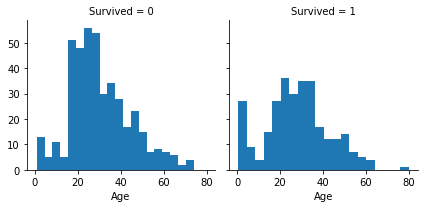

In [10]:
#年龄与生还
g = sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Age',bins=20)

In [11]:
#补充年龄空值
train['Age']=train['Age'].fillna(train['Age'].median()) 

test['Age']=test['Age'].fillna(test['Age'].median())

In [12]:
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q


In [13]:
#数据描述
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#船舱等级与生还
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()\
.sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
#性别与生还
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()\
.sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


d:\python\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


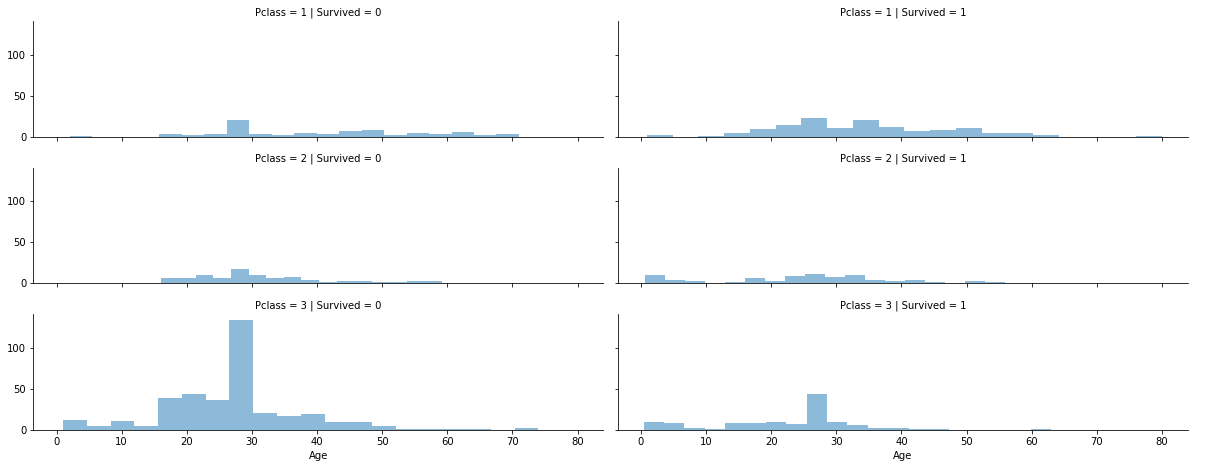

In [16]:
#船舱等级、年龄与生还
grid = sns.FacetGrid(train,col='Survived',row='Pclass',size=2.2,aspect=3.8)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

In [17]:
#数据归一
if __name__ == '__main__':
    for dataset in combine:
        dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [18]:
#删除多余参数
train= train.drop(['Ticket','Cabin'],axis=1)

test=test.drop(['Ticket','Cabin'],axis=1)

combine=[train,test]

In [19]:
train=train.drop(['Name','PassengerId'],axis=1)

test=test.drop(['Name'],axis=1)

combine=[train,test]
print(train.shape,test.shape)

(891, 8) (418, 8)


d:\python\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


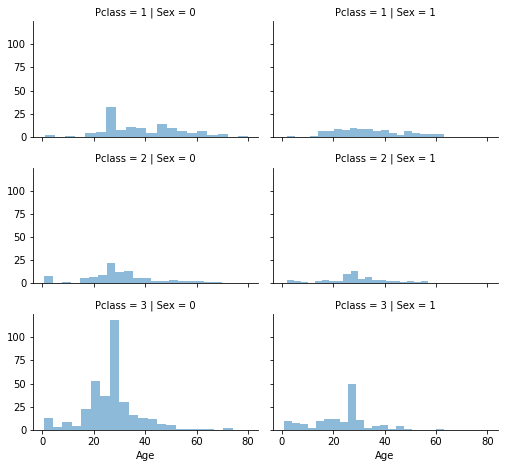

In [20]:
grid = sns.FacetGrid(train,row='Pclass',col='Sex',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()
plt.show()

In [21]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,28.0,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


In [22]:
train=train.drop(['Parch','SibSp'],axis=1)
test=test.drop(['Parch','SibSp'],axis=1)
combine=[train,test]
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,S
1,1,1,1,38.0,71.2833,C
2,1,3,1,26.0,7.9250,S
3,1,1,1,35.0,53.1000,S
4,0,3,0,35.0,8.0500,S


In [23]:
#港口与生还
freq_port = train.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()\
.sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [24]:
#港口数据归一
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,0
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,0
4,0,3,0,35.0,8.0500,0


In [25]:
#划定费用范围
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean()\
      .sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [26]:
train.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,FareBand
0,0,3,0,22.0,7.2500,0,"(-0.001, 7.91]"
1,1,1,1,38.0,71.2833,1,"(31.0, 512.329]"
2,1,3,1,26.0,7.9250,0,"(7.91, 14.454]"
3,1,1,1,35.0,53.1000,0,"(31.0, 512.329]"
4,0,3,0,35.0,8.0500,0,"(7.91, 14.454]"


In [27]:
#费用归一
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
train= train.drop(['FareBand'],axis=1)
combine = [train,test]
train.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,0,0
1,1,1,1,38.0,3,1
2,1,3,1,26.0,1,0
3,1,1,1,35.0,3,0
4,0,3,0,35.0,1,0


In [34]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from  sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import recall_score

In [35]:
#建模参数准备，划分训练测试集
features=['Sex','Age','Pclass','Embarked','Fare']
X=train[features]
Y=train['Survived']
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size=0.3, random_state=0)
X_test = test.drop('PassengerId',axis=1).copy()

In [36]:
test

,PassengerId,Pclass,Sex,Age,Fare,Embarked
0,892,3,0,34.5,0,2
1,893,3,1,47.0,0,0
2,894,2,0,62.0,1,2
3,895,3,0,27.0,1,0
4,896,3,1,22.0,1,0
...,...,...,...,...,...,...
413,1305,3,0,27.0,1,0
414,1306,1,1,39.0,3,1
415,1307,3,0,38.5,0,0
416,1308,3,0,27.0,1,0


In [44]:
#CART决策树
clf = DecisionTreeClassifier(criterion='gini')
clf = clf.fit(train_features, train_labels)
test_predict = clf.predict(test_features)
train_predict= clf.predict(train_features)
Y_predict= clf.predict(X_test)
acc_cart = round(accuracy_score(train_labels, train_predict)* 100,2)
acc_cart

94.06

In [45]:
score_cart = round(accuracy_score(test_labels, test_predict)* 100,2)
recall_cart= round(recall_score(test_labels, test_predict)* 100,2)
print(acc_cart)
print(recall_cart)

94.06
70.0


In [192]:
#支支持向量机
svc = SVC()
svc.fit(train_features, train_labels)
test_predict = svc.predict(test_features)
acc_svc = round(svc.score(train_features, train_labels) * 100,2)
acc_svc

62.6

In [193]:
acc_svc  = round(accuracy_score(test_labels, test_predict)* 100,2)
recall_svc= round(recall_score(test_labels, test_predict)* 100,2)
print(acc_svc)
print(recall_svc)

64.93
11.0


In [194]:
gaussian = GaussianNB()
gaussian.fit(train_features, train_labels)
test_predict= gaussian.predict(test_features)
acc_gaussian = round(gaussian.score(train_features, train_labels)*100,2)
acc_gaussian

74.8

In [195]:
acc_gaussian=round(accuracy_score(test_labels, test_predict)* 100,2)
recall_gaussian= round(recall_score(test_labels, test_predict)* 100,2)
print(acc_gaussian)
print(recall_gaussian)

77.99
80.0


In [196]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_features, train_labels)
test_predict = random_forest.predict(test_features)
acc_random_forest = round(random_forest.score(train_features, train_labels)*100,2)
acc_random_forest

94.06

In [199]:
acc_random_forest=round(accuracy_score(test_labels, test_predict)* 100,2)
recall_random_forest= round(recall_score(test_labels, test_predict)* 100,2)
Y_predict= random_forest.predict(X_test)
print(acc_random_forest)
print(recall_random_forest)

81.34
73.0


In [201]:
Y_predict

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,

In [ ]:
acc_log=round(accuracy_score(test_labels, test_predict)* 100,2)
recall_log= round(recall_score(test_labels, test_predict)* 100,2)
print(acc_log)
print(recall_log)

In [40]:
fpr, tpr, thresholds = roc_curve(test_labels, test_predict);
roc_auc = auc(fpr, tpr) 

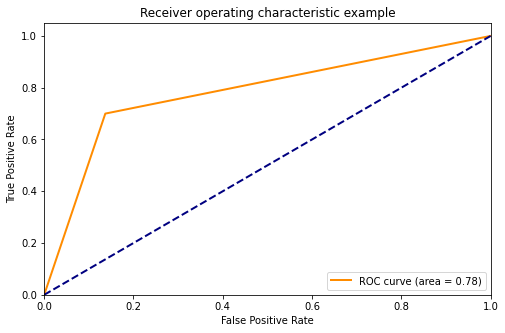

In [41]:

lw = 2
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")


In [46]:
test['Survived']= pd.DataFrame(Y_predict)
test['Survived']

0      0
1      0
2      1
3      1
4      1
      ..
413    1
414    1
415    0
416    1
417    1
Name: Survived, Length: 418, dtype: int64

In [47]:
test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Survived
0,892,3,0,34.5,0,2,0
1,893,3,1,47.0,0,0,0
2,894,2,0,62.0,1,2,1
3,895,3,0,27.0,1,0,1
4,896,3,1,22.0,1,0,1
...,...,...,...,...,...,...,...
413,1305,3,0,27.0,1,0,1
414,1306,1,1,39.0,3,1,1
415,1307,3,0,38.5,0,0,0
416,1308,3,0,27.0,1,0,1


In [48]:
test.to_csv(path_or_buf="test4.csv",index=False)